<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [18]:
# Check for GPU
!nvidia-smi

Thu Jul  3 22:13:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.153.02             Driver Version: 570.153.02     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8              9W /   35W |      96MiB /   4096MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [19]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

2.5.1+cu124
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

In [20]:
# health
# robotics
# vehicles

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [21]:
# overfitting is a situation that a machine learning model fits too well to the training data and performs bad (low accuracy) on the test data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [22]:
# feature selection
# use more/less complex models
# feature engineering
# oversampling
# dimensionality resuction
# cross val
# early stopping

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [23]:
# done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [24]:
import torchvision
from torchvision import transforms

train = torchvision.datasets.MNIST(
    root="../CV_Practice/train", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the target
)

test = torchvision.datasets.MNIST(
    root="../CV_Practice/test", # where to download data to?
    train=False, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the target
)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [01:13<00:00, 135kB/s] 


Extracting ../CV_Practice/train/MNIST/raw/train-images-idx3-ubyte.gz to ../CV_Practice/train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 36.9kB/s]


Extracting ../CV_Practice/train/MNIST/raw/train-labels-idx1-ubyte.gz to ../CV_Practice/train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:03<00:00, 508kB/s]


Extracting ../CV_Practice/train/MNIST/raw/t10k-images-idx3-ubyte.gz to ../CV_Practice/train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.62MB/s]


Extracting ../CV_Practice/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../CV_Practice/train/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [01:06<00:00, 150kB/s] 


Extracting ../CV_Practice/test/MNIST/raw/train-images-idx3-ubyte.gz to ../CV_Practice/test/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 75.0kB/s]


Extracting ../CV_Practice/test/MNIST/raw/train-labels-idx1-ubyte.gz to ../CV_Practice/test/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:03<00:00, 424kB/s]


Extracting ../CV_Practice/test/MNIST/raw/t10k-images-idx3-ubyte.gz to ../CV_Practice/test/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.31MB/s]

Extracting ../CV_Practice/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../CV_Practice/test/MNIST/raw



In [25]:
len(train)

60000

In [30]:
len(test)

10000

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [27]:
class_names = train.classes
train_idx = train.class_to_idx

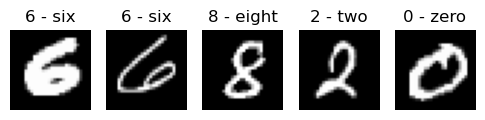

In [28]:
import matplotlib.pyplot as plt

torch.manual_seed(42)

fig = plt.figure(figsize=(6, 6))
rows, cols = 5, 1

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train), size=[1]).item()
    # print(random_idx)
    img, label = train[random_idx]
    fig.add_subplot(cols, rows, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [29]:
train, test

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ../CV_Practice/train
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ../CV_Practice/test
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [31]:
BATCH_SIZE = 32

from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train, batch_size=BATCH_SIZE, shuffle=True)

test_loader = DataLoader(dataset=test, batch_size=BATCH_SIZE, shuffle=True)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [33]:
from torch import nn

class MNISTModel(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model = MNISTModel(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model

MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?